# Training Linear Classifiers
This report illustrates the results of using linear classifiers (one layer networks) with multiple outputs to classify images from the CIFAR-10 dataset. 

In [1]:
# Setup
%matplotlib inline
import cPickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from linear_classifiers import *

# Load training, validation, and test data
train_data, train_labels = load_batch('cifar-10-batches-py/data_batch_', 1)
valid_data, valid_labels = load_batch('cifar-10-batches-py/data_batch_', 2)
test_data, test_labels = load_batch('cifar-10-batches-py/test_batch')

# Initialize parameters as Gaussian random values (mean = 0 and s.d. = 0.01)
K = np.amax(train_labels) + 1
d, N = train_data.shape
np.random.seed(1234567890)
W = np.random.normal(0, 0.01, (K, d))
b = np.random.normal(0, 0.01, (K, 1))

# Set gradient descent parameters
n_epochs = 40
n_batch = 100

## Training a Softmax Classifier

The network is trained using mini-batch gradient descent applied to a cost function that computes the cross-entropy loss of the softmax classifier applied to the labelled training data and an L2 regularization term on the weight matrix.

### Training run 1 (`lambda=0, eta=.1`)

In [2]:
# Set hyperparameters
learning_rate = 0.1 # eta
reg_strength = 0 # lambda

# Create classifier instance
softmax = SoftmaxClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print softmax

Softmax linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 0.1
	regularization stregth 0


In [3]:
# Train softmax classifier using vanilla mini-batch gradient descent 
train_loss, valid_loss, train_acc, valid_acc = softmax.vanilla_gradient_descent(train_data, train_labels, valid_data,\
                                                                                valid_labels, n_epochs, n_batch)

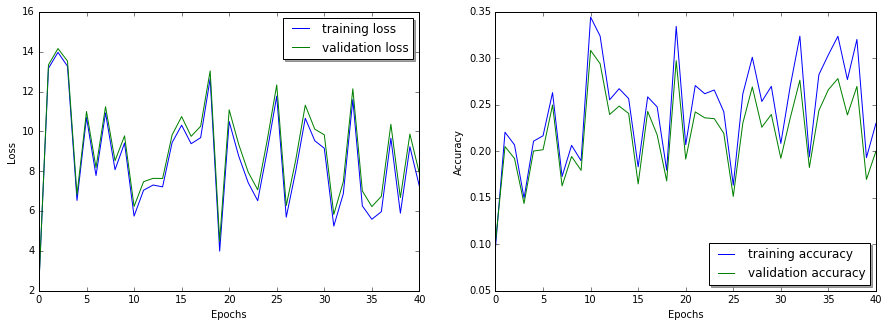

In [4]:
# Plot loss and accuracy 
plot_loss_acc(train_loss, valid_loss, train_acc, valid_acc, n_epochs)

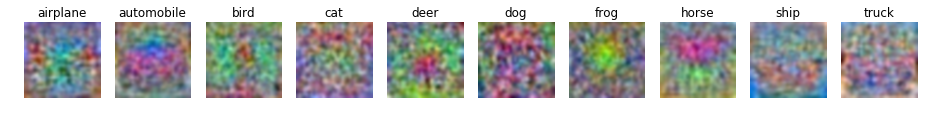

In [5]:
# Visualize W
visualize_weight_matrix(softmax.W)

In [6]:
# Compute the accuracy of the learnt classifier on the test data
test_accuracy = softmax.compute_accuracy(test_data, test_labels)
print test_accuracy

0.2014


### Training run 2 (`lambda=0, eta=.01`)

In [7]:
# Set hyperparameters
learning_rate = 0.01 # eta
reg_strength = 0 # lambda

# Create classifier instance
softmax = SoftmaxClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print softmax

Softmax linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 0.01
	regularization stregth 0


In [8]:
# Train softmax classifier using vanilla mini-batch gradient descent 
train_loss, valid_loss, train_acc, valid_acc = softmax.vanilla_gradient_descent(train_data, \
                                    train_labels, valid_data, valid_labels, n_epochs, n_batch)

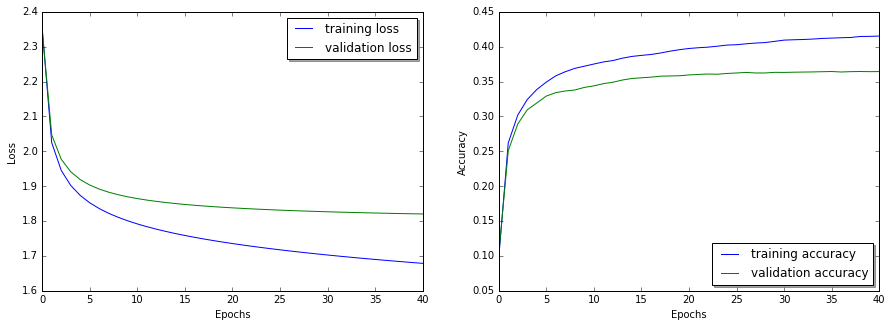

In [9]:
# Plot loss and accuracy 
plot_loss_acc(train_loss, valid_loss, train_acc, valid_acc, n_epochs)

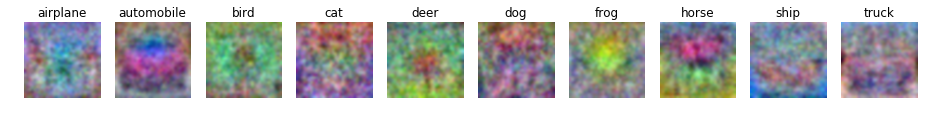

In [10]:
# Visualize W
visualize_weight_matrix(softmax.W)

In [11]:
# Compute the accuracy of the learnt classifier on the test data
test_accuracy = softmax.compute_accuracy(test_data, test_labels)
print test_accuracy

0.3713


### Training run 3 (`lambda=.1, eta=.01`)

In [12]:
# Set hyperparameters
learning_rate = 0.01 # eta
reg_strength = 0.1 # lambda

# Create classifier instance
softmax = SoftmaxClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print softmax

Softmax linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 0.01
	regularization stregth 0.1


In [13]:
# Train softmax classifier using vanilla mini-batch gradient descent 
train_loss, valid_loss, train_acc, valid_acc = softmax.vanilla_gradient_descent(train_data, train_labels, valid_data,\
                                                                                valid_labels, n_epochs, n_batch)

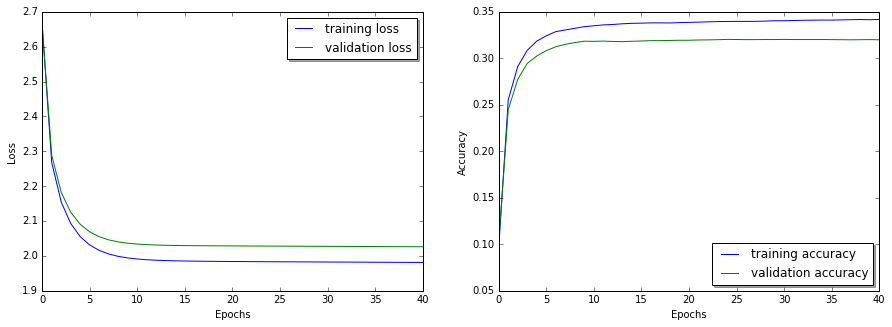

In [14]:
# Plot loss and accuracy 
plot_loss_acc(train_loss, valid_loss, train_acc, valid_acc, n_epochs)

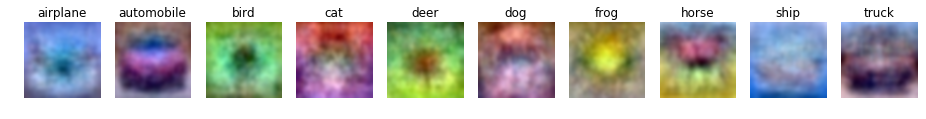

In [15]:
# Visualize W
visualize_weight_matrix(softmax.W)

In [16]:
# Compute the accuracy of the learnt classifier on the test data
test_accuracy = softmax.compute_accuracy(test_data, test_labels)
print test_accuracy

0.3338


### Training run 4 (`lambda=1, eta=.01`)

In [17]:
# Set hyperparameters
learning_rate = 0.01 # eta
reg_strength = 1 # lambda

# Create classifier instance
softmax = SoftmaxClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print softmax

Softmax linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 0.01
	regularization stregth 1


In [18]:
# Train softmax classifier using vanilla mini-batch gradient descent 
train_loss, valid_loss, train_acc, valid_acc = softmax.vanilla_gradient_descent(train_data, \
                                    train_labels, valid_data, valid_labels, n_epochs, n_batch)

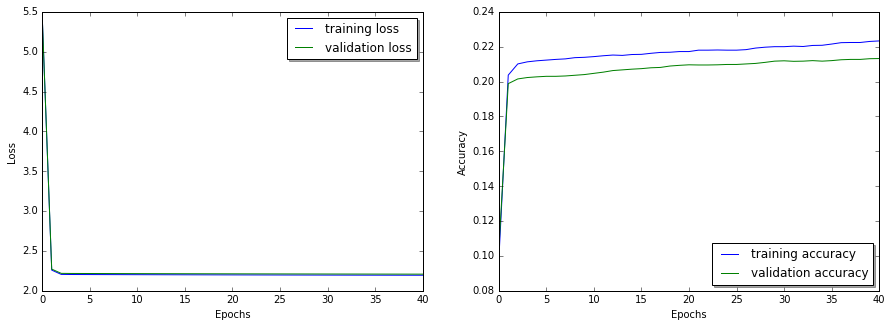

In [19]:
# Plot loss and accuracy 
plot_loss_acc(train_loss, valid_loss, train_acc, valid_acc, n_epochs)

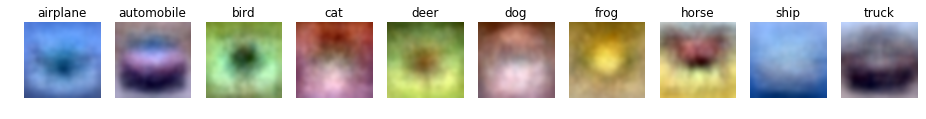

In [20]:
# Visualize W
visualize_weight_matrix(softmax.W)

In [21]:
# Compute the accuracy of the learnt classifier on the test data
test_accuracy = softmax.compute_accuracy(test_data, test_labels)
print test_accuracy

0.2191


### Observations

As can be observed from the plots, increasing the amount of regularisation has a positive effect initially, by lowering the chance of overfitting (and hence improving generalisation). However, after a certain point, regularisation practically kills the network because it dominates the data component of the loss and forces all parameter values to be close to 0 (this can be observed in the brightness of the visualized weight matrices). 

The learning rate is also very important. A low learning rate will make the network converge eventually but at a very slow rate. Too high of a learning rate can make the network jump too far and not be able to converge on a local minimum. This can be recognized from the presence of the zigzags. The learning rate takes very different values for different classifiers. As shown below, the Multiclass SVM Classifier uses a much lower learning rate (because in the case of SVM, the gradients are larger than for softmax).

## Training a Multiclass SVM Classifier

The network is trained using mini-batch gradient descent applied to a cost function that computes either the hinge loss or squared hinge loss of the SVM classifier applied to the labelled training data and an L2 regularization term on the weight matrix.

### Training run 1 (`lambda=0, eta=.0001`)

In [2]:
# Set hyperparameters
learning_rate = 0.0001 # eta
reg_strength = 0 # lambda

# Create classifier instance
svm = SvmClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print svm

SVM linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 0.0001
	regularization stregth 0


In [3]:
# Train svm classifier using vanilla mini-batch gradient descent 
train_loss, valid_loss, train_acc, valid_acc = svm.vanilla_gradient_descent(train_data, train_labels, valid_data,\
                                                                                valid_labels, n_epochs, n_batch)

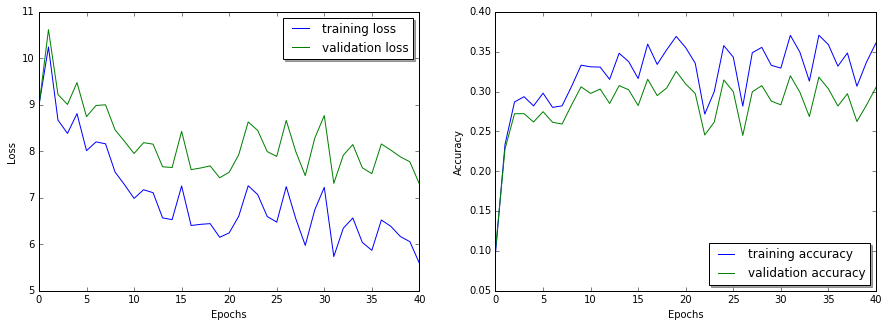

In [4]:
# Plot loss and accuracy 
plot_loss_acc(train_loss, valid_loss, train_acc, valid_acc, n_epochs)

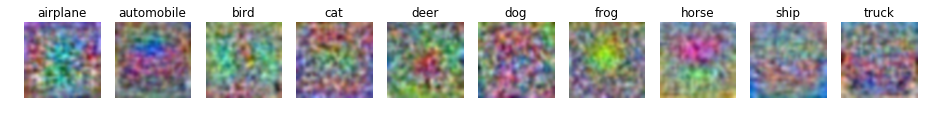

In [5]:
# Visualize W
visualize_weight_matrix(svm.W)

In [6]:
# Compute the accuracy of the learnt classifier on the test data
test_accuracy = svm.compute_accuracy(test_data, test_labels)
print test_accuracy

0.3097


### Training run 2 (`lambda=0, eta=.00001`)

In [7]:
# Set hyperparameters
learning_rate = 0.00001 # eta
reg_strength = 0 # lambda

# Create classifier instance
svm = SvmClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print svm

SVM linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 1e-05
	regularization stregth 0


In [8]:
# Train svm classifier using vanilla mini-batch gradient descent 
train_loss, valid_loss, train_acc, valid_acc = svm.vanilla_gradient_descent(train_data, \
                                    train_labels, valid_data, valid_labels, n_epochs, n_batch)

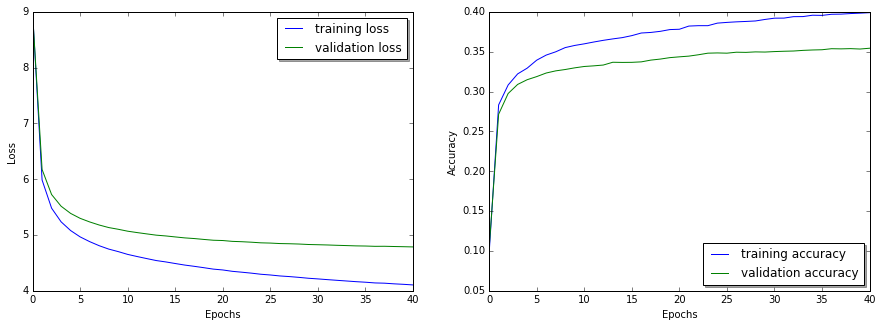

In [9]:
# Plot loss and accuracy 
plot_loss_acc(train_loss, valid_loss, train_acc, valid_acc, n_epochs)

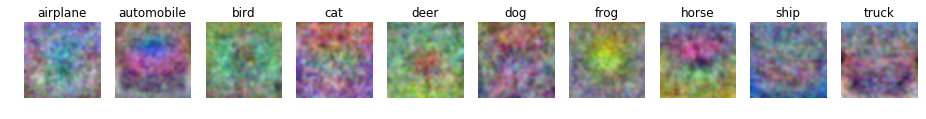

In [10]:
# Visualize W
visualize_weight_matrix(svm.W)

In [11]:
# Compute the accuracy of the learnt classifier on the test data
test_accuracy = svm.compute_accuracy(test_data, test_labels)
print test_accuracy

0.3572


### Training run 3 (`lambda=.1, eta=.00001`)

In [12]:
# Set hyperparameters
learning_rate = 0.00001 # eta
reg_strength = 0.1 # lambda

# Create classifier instance
svm = SvmClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print svm

SVM linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 1e-05
	regularization stregth 0.1


In [13]:
# Train svm classifier using vanilla mini-batch gradient descent 
train_loss, valid_loss, train_acc, valid_acc = svm.vanilla_gradient_descent(train_data, train_labels, valid_data,\
                                                                                valid_labels, n_epochs, n_batch)

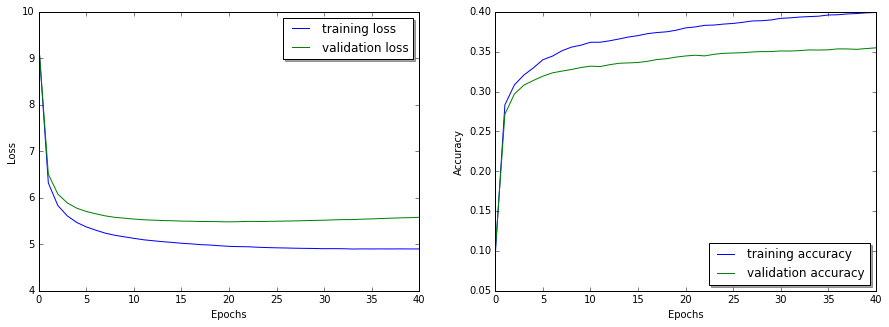

In [14]:
# Plot loss and accuracy 
plot_loss_acc(train_loss, valid_loss, train_acc, valid_acc, n_epochs)

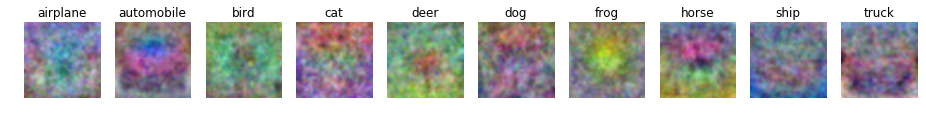

In [15]:
# Visualize W
visualize_weight_matrix(svm.W)

In [16]:
# Compute the accuracy of the learnt classifier on the test data
test_accuracy = svm.compute_accuracy(test_data, test_labels)
print test_accuracy

0.3572


### Training run 4 (`lambda=1, eta=.00001`)

In [17]:
# Set hyperparameters
learning_rate = 0.00001 # eta
reg_strength = 1 # lambda

# Create classifier instance
svm = SvmClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print svm

SVM linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 1e-05
	regularization stregth 1


In [18]:
# Train svm classifier using vanilla mini-batch gradient descent 
train_loss, valid_loss, train_acc, valid_acc = svm.vanilla_gradient_descent(train_data, \
                                    train_labels, valid_data, valid_labels, n_epochs, n_batch)

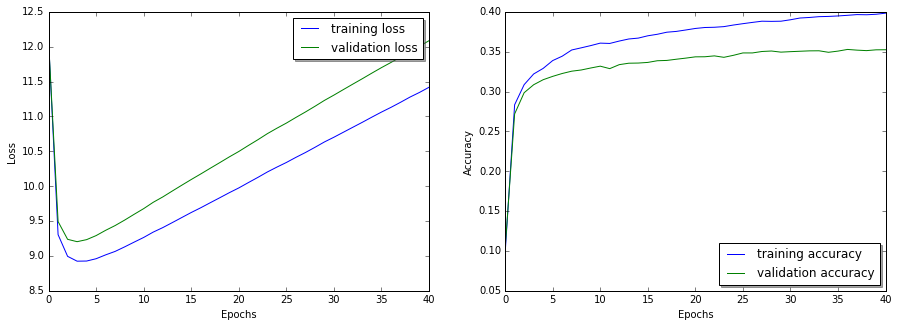

In [19]:
# Plot loss and accuracy 
plot_loss_acc(train_loss, valid_loss, train_acc, valid_acc, n_epochs)

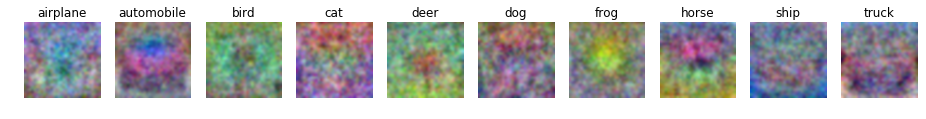

In [20]:
# Visualize W
visualize_weight_matrix(svm.W)

In [21]:
# Compute the accuracy of the learnt classifier on the test data
test_accuracy = svm.compute_accuracy(test_data, test_labels)
print test_accuracy

0.3564


## Optimizing the performance of the network

The following optimization techniques were used:
- All the available training data was used for training. The size of the validation set was decreased down to 1000.
- Trained for a longer time and used the validation set to avoid overfitting by keeping a record of the best model before beginning to overfit.
- Used a decaying learning rate (by a factor of .9 after each epoch).
- Zero-centered data (normalized to [-1 1]).
- Tried different initialization for parameters W and b.

In [22]:
# Load training and test data
test_data, test_labels = load_batch('cifar-10-batches-py/test_batch')
data, labels = load_batch('cifar-10-batches-py/data_batch_', (1, 5))

# Split into training and validation 
train_data, train_labels, valid_data, valid_labels = \
    split_train_data(data, labels, 1000)

# Zero center
train_data -= np.mean(train_data, axis = 0)
valid_data -= np.mean(valid_data, axis = 0)
test_data -= np.mean(test_data, axis = 0)

# Initialize parameters as Gaussian random values with calibrated variances with 1/sqrt(d)
K = np.amax(train_labels) + 1
d, N = train_data.shape
np.random.seed(1234567890)
W = np.random.randn(K, d) / np.sqrt(d)
b = np.zeros((K, 1))

# Set hyperparameters
learning_rate = 0.01 # eta
reg_strength = 0 # lambda
learning_rate_decay = True

# Set other gradient descent parameters
n_epochs = 40
n_batch = 100

Softmax linear classifier
	weight matrix [10 x 3072]
	bias vector [10 x 1]
	learning rate 0.01
	regularization stregth 0


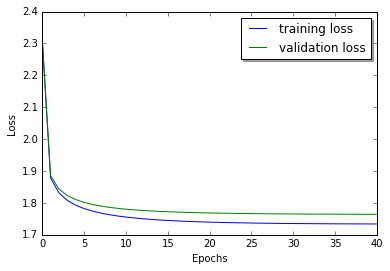

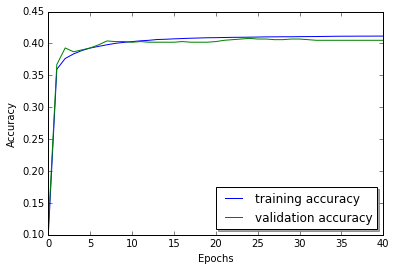

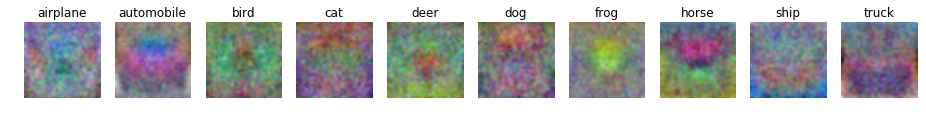

0.3981


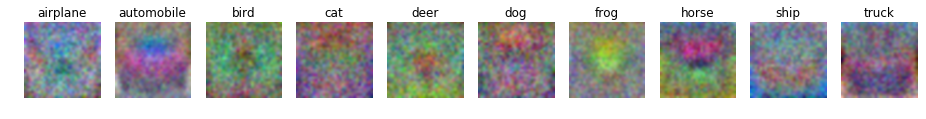

0.3975


In [23]:
# Create classifier instance
softmax = SoftmaxClassifier(np.copy(W), np.copy(b), learning_rate, reg_strength)
print softmax
train_loss, valid_loss, train_acc, valid_acc = \
    softmax.vanilla_gradient_descent(train_data, train_labels, valid_data, \
    valid_labels, n_epochs, n_batch, learning_rate_decay)
# Plot loss
plot_loss(train_loss, valid_loss, n_epochs)
# Plot accuracy
plot_accuracy(train_acc, valid_acc, n_epochs)
# visualize W
visualize_weight_matrix(softmax.W)
# Compute the accuracy of the learnt classifier on the test data
accuracy = softmax.compute_accuracy(test_data, test_labels)
print accuracy

# Saved model before starting to overfit
visualize_weight_matrix(softmax.bestW)
bestsoftmax = SoftmaxClassifier(np.copy(softmax.bestW), np.copy(softmax.bestb), \
    learning_rate, reg_strength)
bestaccuracy = bestsoftmax.compute_accuracy(test_data, test_labels)
print bestaccuracy


These are just a small number of optimization techniques and the parameter values used are not the optimal ones, hence the very small improvement. In a more elaborate study I would use cross validation to find the right parameter values. Additionally grid search and ensemble methods could be used.